In [42]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

In [43]:
iris=load_iris()

In [44]:
X=iris.data
y=iris.target

In [45]:
X.shape

(150, 4)

<Axes: >

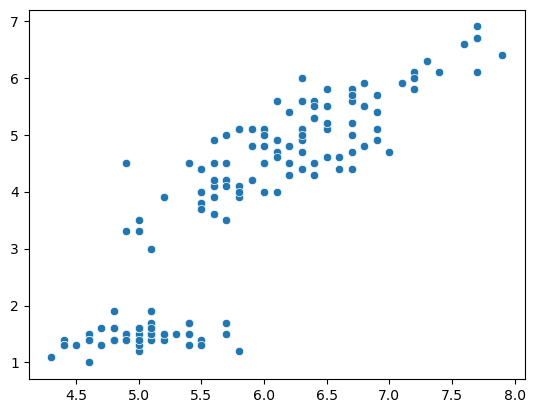

In [46]:
sns.scatterplot(x=X[:,0],y=X[:,2])

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method (WCSS)

In [51]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans


In [68]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  

C:\Users\United\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\United\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\United\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\United\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

<Axes: >

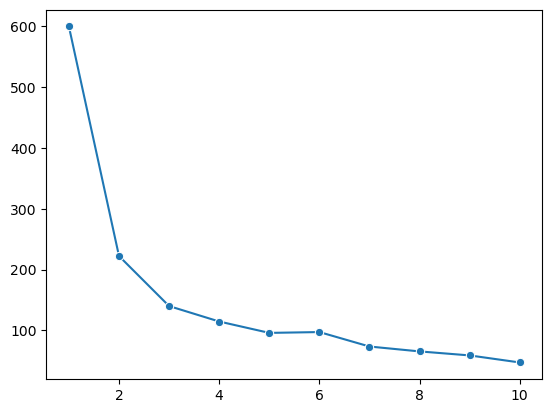

In [54]:
sns.lineplot(x=range(1,11),y=wcss,marker='o')

In [64]:
kmeans = KMeans(n_clusters=3)
y_clusters = kmeans.fit_predict(X_scaled)

print("Cluster Labels:", y_clusters)

Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1]


C:\Users\United\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [65]:
print("Centroids:\n", kmeans.cluster_centers_)


Centroids:
 [[-1.00206653  0.90625492 -1.30310821 -1.25634413]
 [ 1.03359865  0.00613858  0.94360463  0.9725624 ]
 [-0.16840578 -0.9726981   0.2598706   0.17543327]]


<Axes: >

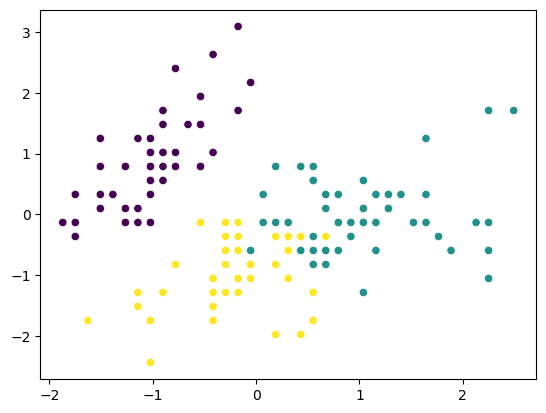

In [67]:
sns.scatterplot(x=X_scaled[:, 0],y=X_scaled[:, 1], c=y_clusters)
